# Questão 2

## B)

In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [7]:
df_b = pd.read_csv("resultados/resultado_questao_b.csv")

In [8]:
def calcular_intervalo_confianca(tempos, confianca=0.95):
    if len(tempos) == 0:
        return float('nan'), float('nan'), float('nan')
    media = np.mean(tempos)
    desvio_padrao = np.std(tempos, ddof=1)
    z = norm.ppf((1 + confianca) / 2)
    erro_padrao = desvio_padrao / np.sqrt(len(tempos))
    intervalo = z * erro_padrao
    return media, media - intervalo, media + intervalo

# Agrupar os resultados por algoritmo e valor máximo
resultados = []
for max_val in df_b["ValorMaximo"].unique():
    df_b_filtrado = df_b[df_b["ValorMaximo"] == max_val]
    
    for algoritmo in df_b_filtrado["Algoritmo"].unique():
        tempos = df_b_filtrado[df_b_filtrado["Algoritmo"] == algoritmo]["TempoDeOrdenacao"].values
        media, intervalo_inf, intervalo_sup = calcular_intervalo_confianca(tempos)

        resultados.append([algoritmo, max_val, media, intervalo_inf, intervalo_sup])

# Criar um DataFrame com os resultados processados
df_b_resultados = pd.DataFrame(resultados, columns=["Algoritmo", "ValorMaximo", "TempoMedio", "IntervaloInferior", "IntervaloSuperior"])

# Determinar o melhor e o pior algoritmo para cada valor máximo
for max_val in df_b_resultados["ValorMaximo"].unique():
    df_b_max = df_b_resultados[df_b_resultados["ValorMaximo"] == max_val]
    melhor_algoritmo = df_b_max.loc[df_b_max["TempoMedio"].idxmin()]
    pior_algoritmo = df_b_max.loc[df_b_max["TempoMedio"].idxmax()]

    print(f"🔹 Para Valor Máximo {max_val}:")
    print(f"✅ Melhor Algoritmo: {melhor_algoritmo['Algoritmo']} (Tempo Médio: {melhor_algoritmo['TempoMedio']:.4f}s)")
    print(f"❌ Pior Algoritmo: {pior_algoritmo['Algoritmo']} (Tempo Médio: {pior_algoritmo['TempoMedio']:.4f}s)")
    print("-" * 50)

🔹 Para Valor Máximo 940000:
✅ Melhor Algoritmo: counting (Tempo Médio: 3661.8500s)
❌ Pior Algoritmo: quick (Tempo Médio: 9275.1333s)
--------------------------------------------------


### Gráfico 1

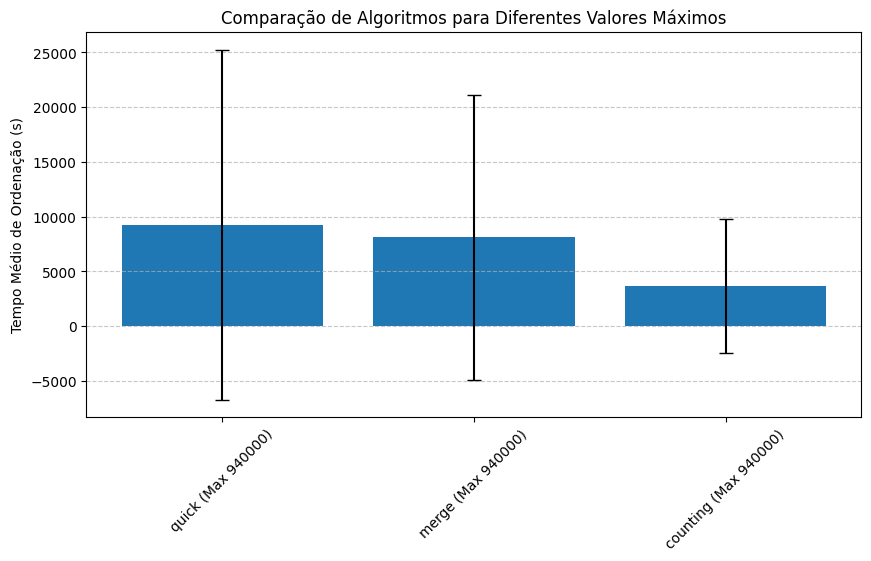

In [9]:
# Criar gráfico de comparação
plt.figure(figsize=(10, 5))
for max_val in df_b_resultados["ValorMaximo"].unique():
    df_b_plot = df_b_resultados[df_b_resultados["ValorMaximo"] == max_val]
    plt.bar(df_b_plot["Algoritmo"] + f" (Max {max_val})", df_b_plot["TempoMedio"], yerr=df_b_plot["TempoMedio"] - df_b_plot["IntervaloInferior"], capsize=5)

plt.ylabel("Tempo Médio de Ordenação (s)")
plt.title("Comparação de Algoritmos para Diferentes Valores Máximos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
